In [1]:
import sys
import os
import json

import torch 
torch.cuda.empty_cache()

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../dataset_generation'))

from NN_TopOpt import SIMP_basic
from TopOpt import TopOptimizer2D
import yaml

methods = {
    "simp_basic": SIMP_basic,
}

Info    : Reading '../test_problems/Square_cantilever_beam.msh'...
Info    : 9 entities
Info    : 5381 nodes
Info    : 10492 elements
Info    : Done reading '../test_problems/Square_cantilever_beam.msh'
Compute areas ...


100%|██████████| 10492/10492 [00:00<00:00, 216926.80it/s]


Whole area 1.0


100%|██████████| 10492/10492 [00:00<00:00, 31531.04it/s]


Fixed case:  fixed_xy [0, [0, 1]] 68 5381
Loaded loads:  (4,)
check dv 0 0.8007118455937392
Build filter matrix ...


100%|██████████| 10492/10492 [00:00<00:00, 12105.61it/s]


Iteration: 1 | current volfrac: 0.409868 | compliance: 111.591150
Iteration: 2 | current volfrac: 0.409833 | compliance: 73.546903
Iteration: 3 | current volfrac: 0.409858 | compliance: 51.711538
Iteration: 4 | current volfrac: 0.410059 | compliance: 37.660081
Iteration: 5 | current volfrac: 0.409912 | compliance: 29.691055
Iteration: 6 | current volfrac: 0.410035 | compliance: 23.926571
Iteration: 7 | current volfrac: 0.409918 | compliance: 21.145261
Iteration: 8 | current volfrac: 0.409996 | compliance: 19.517967
Iteration: 9 | current volfrac: 0.409943 | compliance: 18.314050
Iteration: 10 | current volfrac: 0.409983 | compliance: 17.444722
Iteration: 11 | current volfrac: 0.409960 | compliance: 16.812844
Iteration: 12 | current volfrac: 0.409990 | compliance: 16.387243
Iteration: 13 | current volfrac: 0.410030 | compliance: 16.093707
Iteration: 14 | current volfrac: 0.409996 | compliance: 15.872222
Iteration: 15 | current volfrac: 0.410027 | compliance: 15.717970
Iteration: 16 | cu

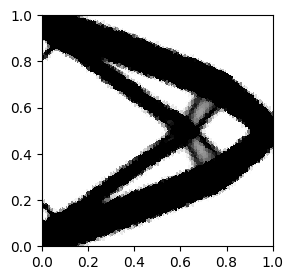

Iteration: 20 | current volfrac: 0.410009 | compliance: 15.345753
Iteration: 21 | current volfrac: 0.409982 | compliance: 15.294074
Iteration: 22 | current volfrac: 0.409987 | compliance: 15.247485
Iteration: 23 | current volfrac: 0.410037 | compliance: 15.206988
Iteration: 24 | current volfrac: 0.410031 | compliance: 15.178692
Iteration: 25 | current volfrac: 0.410032 | compliance: 15.165659
Iteration: 26 | current volfrac: 0.410002 | compliance: 15.156914
Iteration: 27 | current volfrac: 0.409973 | compliance: 15.151137
Iteration: 28 | current volfrac: 0.409984 | compliance: 15.146000
Iteration: 29 | current volfrac: 0.410015 | compliance: 15.140536
Iteration: 30 | current volfrac: 0.409976 | compliance: 15.135937
Iteration: 31 | current volfrac: 0.410020 | compliance: 15.136239
Iteration: 32 | current volfrac: 0.409991 | compliance: 15.132777
Iteration: 33 | current volfrac: 0.410027 | compliance: 15.132133
Iteration: 34 | current volfrac: 0.410019 | compliance: 15.128430
Iteration:

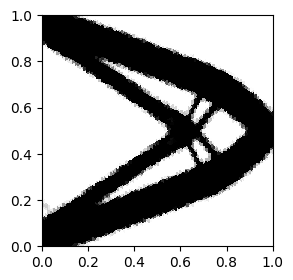

Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 119623.56it/s]

28.806593316088282 3.111649218569145


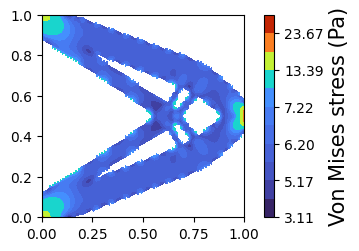

vf: 0.410013 | compliance: 15.104709 | max_stress: 28.806593


(0.41001256654708657, 15.104708719345203, 28.806593316088282)

In [6]:
experiment_dir = "../configs/NN_top_optimization/SIMP_basic"

# select config
# config_name = "MBB_beam_half" 
# config_name = "Cant_beam"
# config_name = "Cant_beam_distrL"
# config_name = "Brecket"

# config_name = "Square_beam"
# config_name = "Square_beam_distrL"
config_name = "Square_cantilever_beam"

config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
TopOptimizer = TopOptimizer2D(methods, params)
TopOptimizer.optimize(plot_interval=20)
TopOptimizer.print_metrics()

28.806593316088282 3.111649218569145


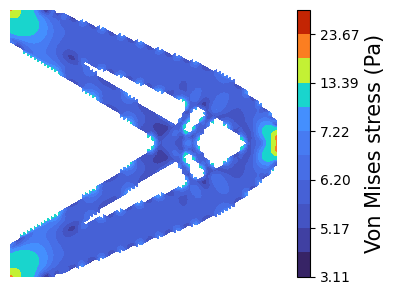

vf: 0.410013 | compliance: 15.104709 | max_stress: 28.806593


In [7]:
# geometry_features = TopOptimizer.method.gaussian_core.get_geometry()

gray = False

root_dir = "../src/model_comparison/SIMP_basic"

os.makedirs(root_dir, exist_ok=True)

filename = f"{root_dir}/{config_name}.png"
if gray:
    filename = f"{root_dir}/{config_name}_SIMP_gray.png"
TopOptimizer.plot_final_result(filename=filename, plot_von_mises=not gray)

vf, compliance, max_stress = TopOptimizer.print_metrics()
metrics = {
    "vf": vf,
    "compliance": compliance,
    "max_stress": max_stress
}

if gray:
    filename_metrics = f"{root_dir}/{config_name}_gray.json"
else:
    filename_metrics = f"{root_dir}/{config_name}.json"
with open(filename_metrics, "w") as f:
    json.dump(metrics, f)